![](resources/perceptron.png)

## 파라미터 초기화

퍼셉트론에 필요한 파라미터 변수를 무작위로 초기화하자
- 입력값: X
- 가중치: W
- 편향치: b
- 목표값:

In [1]:
import numpy as np
np.random.seed(42)

X = np.array([0.5, 0.5, 0.5])  # 입력값 = [0.5, 0.5, 0.5]
W = np.random.rand(3)          # 가중치 3개 무작위 초기화
b = np.random.rand(1)          # 편향치 1개 무작위 초기화
y = np.array([-1])             # 목표값 = -1

In [2]:
print("퍼셉트론 파라미터 초기값...")
print("W:", W)
print("b:", b)

퍼셉트론 파라미터 초기값...
W: [0.37454012 0.95071431 0.73199394]
b: [0.59865848]


## 예측 함수
입력값을 가중치와 곱하고 편향치와 더하여 출력값 z를 계산하고,
임계 함수에 통과시켜 예측값 y^을 도출하는 함수를 구현하자


In [3]:
# 예측 함수
def predict(X, W, b):
    z = np.dot(X, W) + b
    return z

# 임계 함수
def threshold(z):
    if z > 0:
        return np.array([1])
    else:
        return np.array([-1])

# 순전파 함수
def forward(X, W, b):
    z = predict(X, W, b)
    y_hat = threshold(z)
    return y_hat

In [4]:
z = predict(X, W, b)
y_hat = threshold(z)
print("출력값 z =", z)
print("예측값 y^ =", y_hat)
print("목표값 y =", y)

출력값 z = [1.62728267]
예측값 y^ = [1]
목표값 y = [-1]


## 학습 구현
모델의 가중치와 편향을 조절하여 예측 성능을 최적화하는 학습을 구현해보자


In [5]:
learning_rate = 0.1
num_epochs = 10

for epoch in range(num_epochs):
    y_hat = forward(X, W, b)
    error = y - y_hat
    W = W + learning_rate * error * X
    b = b + learning_rate * error
    print(f"[Epoch #{epoch + 1}] Error = {error}, W = {W}, b = {b}")

[Epoch #1] Error = [-2], W = [0.27454012 0.85071431 0.63199394], b = [0.39865848]
[Epoch #2] Error = [-2], W = [0.17454012 0.75071431 0.53199394], b = [0.19865848]
[Epoch #3] Error = [-2], W = [0.07454012 0.65071431 0.43199394], b = [-0.00134152]
[Epoch #4] Error = [-2], W = [-0.02545988  0.55071431  0.33199394], b = [-0.20134152]
[Epoch #5] Error = [-2], W = [-0.12545988  0.45071431  0.23199394], b = [-0.40134152]
[Epoch #6] Error = [0], W = [-0.12545988  0.45071431  0.23199394], b = [-0.40134152]
[Epoch #7] Error = [0], W = [-0.12545988  0.45071431  0.23199394], b = [-0.40134152]
[Epoch #8] Error = [0], W = [-0.12545988  0.45071431  0.23199394], b = [-0.40134152]
[Epoch #9] Error = [0], W = [-0.12545988  0.45071431  0.23199394], b = [-0.40134152]
[Epoch #10] Error = [0], W = [-0.12545988  0.45071431  0.23199394], b = [-0.40134152]


In [6]:
z = predict(X, W, b)
y_hat = forward(X, W, b)
print("Trained weights:", W)
print("Trained bias:", b)
print("Trained z:", z)
print("Predict y^:", y_hat)

Trained weights: [-0.12545988  0.45071431  0.23199394]
Trained bias: [-0.40134152]
Trained z: [-0.12271733]
Predict y^: [-1]


## 특징 벡터
퍼셉트론 모델의 가중치 $W$를 3차원 공간에서 해석하면 이진 분류기 결정평면을 관찰할 수 있다.

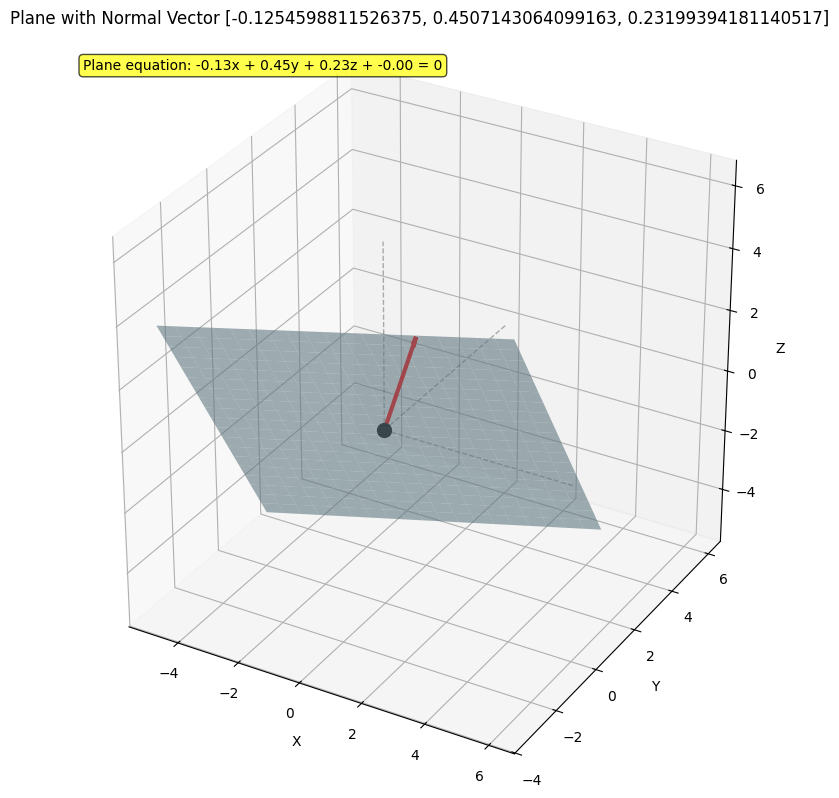

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw_plane_with_normal(normal_vector, point_on_plane=(0, 0, 0), plane_size=5, 
                          normal_length=3, figsize=(10, 8)):
    """
    Draw a 2D plane in 3D space with its normal vector.
    
    Parameters:
    -----------
    normal_vector : tuple or list
        The normal vector (nx, ny, nz) of the plane
    point_on_plane : tuple, optional
        A point that lies on the plane (default: origin)
    plane_size : float, optional
        Size of the plane to display (default: 5)
    normal_length : float, optional
        Length of the normal vector to display (default: 3)
    figsize : tuple, optional
        Figure size (default: (10, 8))
    """

    # Convert to numpy arrays
    normal = np.array(normal_vector)
    point = np.array(point_on_plane)
    
    # Normalize the normal vector
    normal_unit = normal / np.linalg.norm(normal)
    
    # Create two vectors perpendicular to the normal vector
    # Find a vector not parallel to normal
    if abs(normal_unit[0]) < 0.9:
        v1 = np.array([1, 0, 0])
    else:
        v1 = np.array([0, 1, 0])
    
    # Create two orthogonal vectors in the plane
    u = np.cross(normal_unit, v1)
    u = u / np.linalg.norm(u)
    v = np.cross(normal_unit, u)
    v = v / np.linalg.norm(v)
    
    # Create a grid of points on the plane
    s = np.linspace(-plane_size, plane_size, 20)
    t = np.linspace(-plane_size, plane_size, 20)
    S, T = np.meshgrid(s, t)
    
    # Calculate plane points
    plane_points = (point[:, np.newaxis, np.newaxis] + 
                   S[np.newaxis, :, :] * u[:, np.newaxis, np.newaxis] + 
                   T[np.newaxis, :, :] * v[:, np.newaxis, np.newaxis])
    
    X = plane_points[0]
    Y = plane_points[1]
    Z = plane_points[2]
    
    # Create the 3D plot
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    # Draw the plane
    ax.plot_surface(X, Y, Z, alpha=0.6, color='lightblue', 
                   edgecolor='none', label='Plane')
    
    # Draw the normal vector
    normal_end = point + normal_length * normal_unit
    ax.quiver(point[0], point[1], point[2], 
             normal_end[0] - point[0], normal_end[1] - point[1], normal_end[2] - point[2],
             color='red', arrow_length_ratio=0.1, linewidth=3, label='Normal Vector')
    
    # Draw a point on the plane
    ax.scatter(point[0], point[1], point[2], color='black', s=100, label='Point on Plane')
    
    # Add coordinate axes for reference
    max_range = max(plane_size, normal_length) + 1
    ax.plot([0, max_range], [0, 0], [0, 0], 'k--', alpha=0.3, linewidth=1)
    ax.plot([0, 0], [0, max_range], [0, 0], 'k--', alpha=0.3, linewidth=1)
    ax.plot([0, 0], [0, 0], [0, max_range], 'k--', alpha=0.3, linewidth=1)
    
    # Labels and formatting
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Plane with Normal Vector {normal_vector}')
    
    # Set equal aspect ratio
    ax.set_box_aspect([1,1,1])
    
    # Add text showing plane equation
    d = -np.dot(normal, point)  # ax + by + cz + d = 0
    equation = f'Plane equation: {normal[0]:.2f}x + {normal[1]:.2f}y + {normal[2]:.2f}z + {d:.2f} = 0'
    ax.text2D(0.05, 0.95, equation, transform=ax.transAxes, fontsize=10,
              bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    plt.tight_layout()
    plt.show()


coef = W.tolist()
draw_plane_with_normal(coef)